# NLP (Natural Language Processing)

Le traitement automatique du langage naturel (abr. TALN), ou traitement automatique de la langue naturelle, ou encore traitement automatique des langues (abr. TAL) est un domaine multidisciplinaire impliquant la linguistique, l'informatique et l'intelligence artificielle, qui vise à créer des outils de traitement de la langue naturelle pour diverses applications. Il ne doit pas être confondu avec la linguistique informatique, qui vise à comprendre les langues au moyen d'outils informatiques.

Dans ce projet NLP, nous allons classer les avis Yelp en catégories une étoile ou 5 étoiles en fonction du contenu du texte dans les avis. Nous allons utiliser le dataset yelp.csv contenu dans le dossier du notebook.

**Chaque observation de cet ensemble de données est un avis d'une entreprise particulière par un utilisateur particulier.**

**La colonne "stars" est le nombre d'étoiles (1 à 5) attribuées par le réviseur à l'entreprise. (Des étoiles plus élevées, c'est mieux.) En d'autres termes, c'est la note de l'entreprise par la personne qui a rédigé la critique.**

**La colonne "cool" est le nombre de votes "cool" reçus par les autres utilisateurs de Yelp à un avis sur l'entreprise.**

**Tous les avis commencent par 0 votes "cool", et il n'y a pas de limite au nombre de votes "cool" qu'un avis peut recevoir. En d'autres termes, c'est une note de l'avis lui-même, pas une note de l'entreprise.**

**Les colonnes "utiles" et "drôles" sont similaires à la colonne "cool".**

Ceci était une brève introduction sur le dataset que nous allons utiliser. Commençons le projet...

In [42]:
#Nous importons pandas et numpy
import pandas as pd
import numpy as np

In [41]:
#Importons les bibliothèques de visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

#Pour que la visualisation se fasse dans le notebook...
%matplotlib inline

In [44]:
#Nous allons faire la lecture du dataset avec pandas (nous allons le nommer yelp)
yelp = pd.read_csv('yelp.csv')


In [43]:
#Nous allons faire apparaître les première lignes du dataset, avoir les infos et utiliser la méthode describe pour avoir
#Des informations supllémentaire (comme la moyenne, le max etc)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


Nous pouvons remarquer lors de la lecture des colonnes qu'il y a plusieurs variables. **business_id** est l'id avec lequel l'utilisateur donne son avis. **date** est la data où l'utilisateur a donné son avis. **review_id** comme nous pouvons le deviner est un id d'avis. **stars** est le nombre d'étoiles attribué. **text** est le commentaire donné lors de l'avis. **type** est le type de commentaire d'avis. **user_id** est un autre id donné à l'utilisateur. et puis nous trouvons les **cool**,**useful** et **funny** octroyés par d'autre utilisateur de même rang au commentaire de chaque utilisateur.

In [39]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
 10  text length  10000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [7]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [45]:
#Nous allons créer une nouvelle colonne "text length" qui représente le nombre de mots dans la colonne text.
yelp['text length'] = yelp['text'].apply(len)

## Visualisation de données

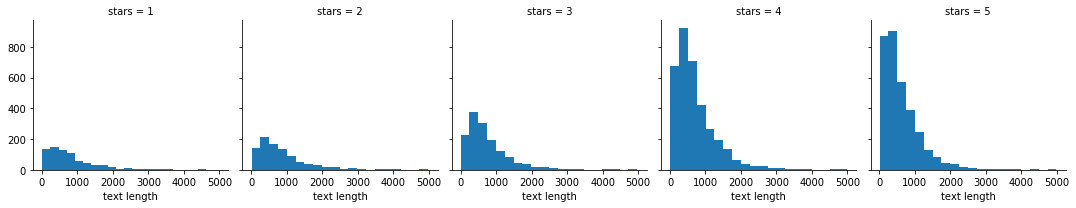

In [13]:
#Nous utiliserons FacetGrid de seaborn pour créer une grille de 5 histogrammes basés sur text length sur chaque nombre
#d'étoile (une à 5)
#Traçons la grille
g = sns.FacetGrid(data = yelp,col='stars')
#Créer 5 histrogrammes basés sur text length (quand nous avons un nombre de bin plus grand nous avons plus de détails)
g.map(plt.hist, 'text length', bins = 20)

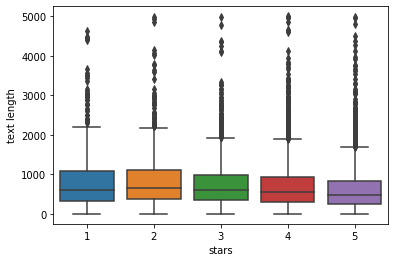

In [48]:
#Nous allons créer un boxplot pour la même opération que nous avons déjà faite..
sns.boxplot(x='stars',y='text length',data = yelp)

Nous pouvons remarque que pour le nombre d'étoiles 1 et 2 nous avons de grands textes.

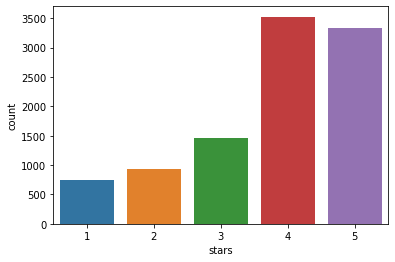

In [47]:
#Créons maintenant un countplot de nombre d'avis pour chaque type de chaque étoile
sns.countplot(x='stars',data = yelp)

In [17]:
#Nous voulons la moyenne d'avis "cool","useful","funny" et longueur de texte sur chaque étoile
stars = yelp.groupby('stars').mean()

In [18]:
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [49]:
#Nous pouvons même avoir la correlation entre chaque colonne du mini dataset "stars" (en utilisant corr())
correlation = stars.corr()
correlation

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


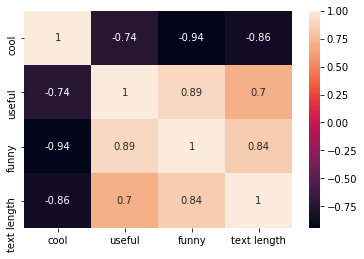

In [26]:
#Visualisons cette mini dataset de correlation avec la heatmap de seaborn
#annot=True pour visualiser les valeurs de correlation
sns.heatmap(correlation, annot = True)

Nous pouvons remarquer que par exemple **funny** est bien correlée à **useful** ... D'autres correlation peuvent ne pas être intéressante mais nous cherchons toujours plus d'informations pour comprendre le dataset avec de l'étudier et faire marcher des modèles de machine learning sur ce dernier.

## Classification NLP
Pour rendre la tache un peu facile, nous allons prendre les avis d'étoiles 1 ou 5.

In [50]:
#Nous créons un dataframe 'yelp_class' qui contient les colonne du dataframe 'yelp' mais seulement pour une ou 5 étoiles.
yelp_class = yelp[yelp['stars']==1 | (yelp['stars']==5)]

In [54]:
#Nous créons X et y
#X sera la colonne 'text' de yelp_class et y sera la colonne 'stars' de yelp_class
X = yelp_class['text']
y = yelp_class['stars']

Nous nous sommes basés sur deux liens pour bien comprendre ce qu'est le CountVectorizer et d'autres utilités utilisées dans le NLP process. 

[Lien1](https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e)
[Lien2](http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/artificiel_tokenize_features.html)

In [55]:
#Nous importons le CountVectorizer util dans le NLP pour créer un object CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [53]:
#Nous allons utiliser cela sur la colonne X
X = cv.fit_transform(X)

## Pratiquons le Train/Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

Il n y a rien de nouveau dans ces deux phases puisque ça se répète avant l'utilisation de tout modèle de Machine Learning...

## Entrainement de modèle
Ou train a model en anglais

In [56]:
#Nous allons importer le MultinomialNB modèle et nous allons créer une instance de l'estimateur (nb)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [57]:
#Nous allons appliquer ce modèle sur X train et y train déjà spécifiés dans la section train/split
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Prédiction et évaluation du modèle

In [58]:
predictions = nb.predict(X_test)

In [59]:
#Nous avons des outils pour évaluer le modèle mais nous allons utiliser le célèbre 'classification report'
#Ces mêmes étapes se répétent lors de l'utilisation de modèles différents...
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       225

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



Très belle précision ...

Nous avons fait des recherches sur ce sujet et nous avons trouvé qu'il était possible d'utiliser une pipeline pour automatiser le processus que l'on fait sans répéter toutes les étapes à la fois. Mais nous avons jugé que c'était un peu poussé pour nous. Notons que nous pouvons utiliser n'importe quel modèle sur notre dataset mais nous avons voulu utiliser celui là car c'est le plus adapté dans le cas de la NLP. En ce qui concerne les autres algorithmes, voici le github repository où l'on a fait le practice sur tous les autres algorithmes sur différents dataset.

[Lien github algos ML](https://github.com/KaiCloud34813/Machine-Learning-Algorithms-on-Projects)